In [1]:
import EOSutils as meos

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.style.use('classic')

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil
import copy

from scipy import interpolate
from scipy.linalg import lstsq as scipy_lstsq
from scipy.ndimage import gaussian_filter
import scipy.integrate as integrate
import decimal 

%matplotlib inline

In [2]:
profiles = meos.load_sample_planet_profiles(Minit=np.array((1.09,7.59,20.0)), Rinit=2.0, Zinit=0.025, comps=['uniform','inert_core'], Sinit=np.array((9.0,11.0)), alphas=2.0, ages=np.array((1.e6,1.e10)))

min_log10T = []
max_log10T = []
for prof in profiles:
    min_log10T.append(np.min(prof['logT']))
    max_log10T.append(np.max(prof['logT']))

min_log10T = np.array(min_log10T)
max_log10T = np.array(max_log10T)

print(np.min(min_log10T),np.max(max_log10T))

2.168964476135679 5.832767118000771


/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:735: RuntimeWarning: overflow encountered in power
  Fgrid = 10**self.log10Egrid - ((10**self.log10Tgrid) * (10**self.log10Sgrid))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:735: RuntimeWarning: invalid value encountered in subtract
  Fgrid = 10**self.log10Egrid - ((10**self.log10Tgrid) * (10**self.log10Sgrid))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:745: RuntimeWarning: invalid value encountered in log10
  self.log10Fgrid = np.log10(self.Fgrid)
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:746: RuntimeWarning: invalid value encountered in log10
  self.F_log10Pgrid = np.log10(self.F_Pgrid)
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:747: RuntimeWarning: invalid value encountered in log10
  self.F_log10Sgrid = np.log10(self.F_Sgrid)
/Users/emily/Document

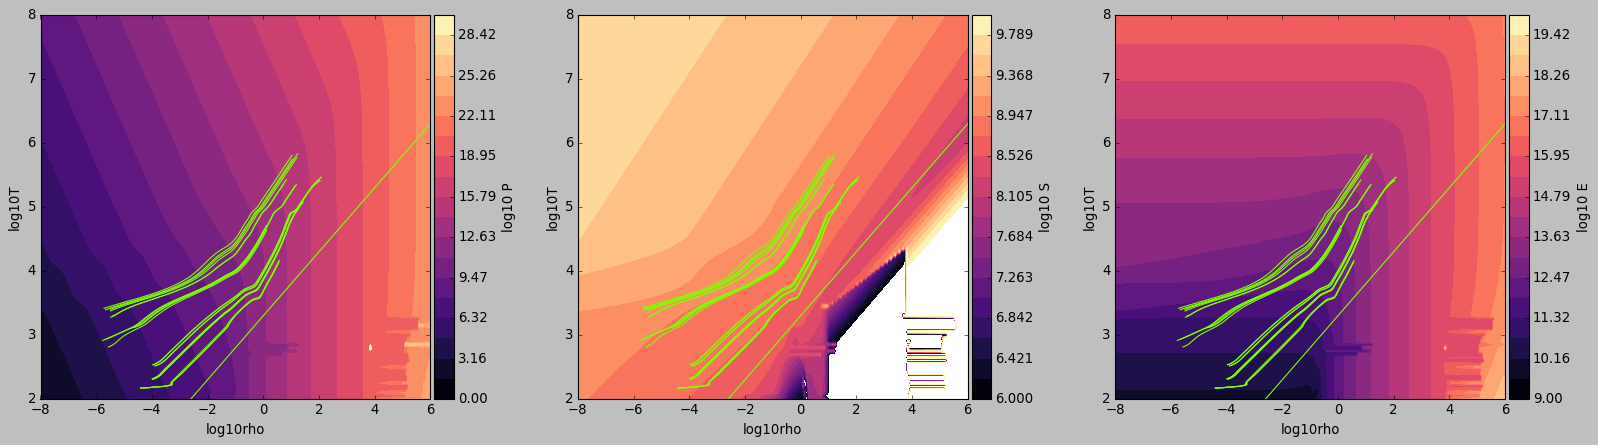

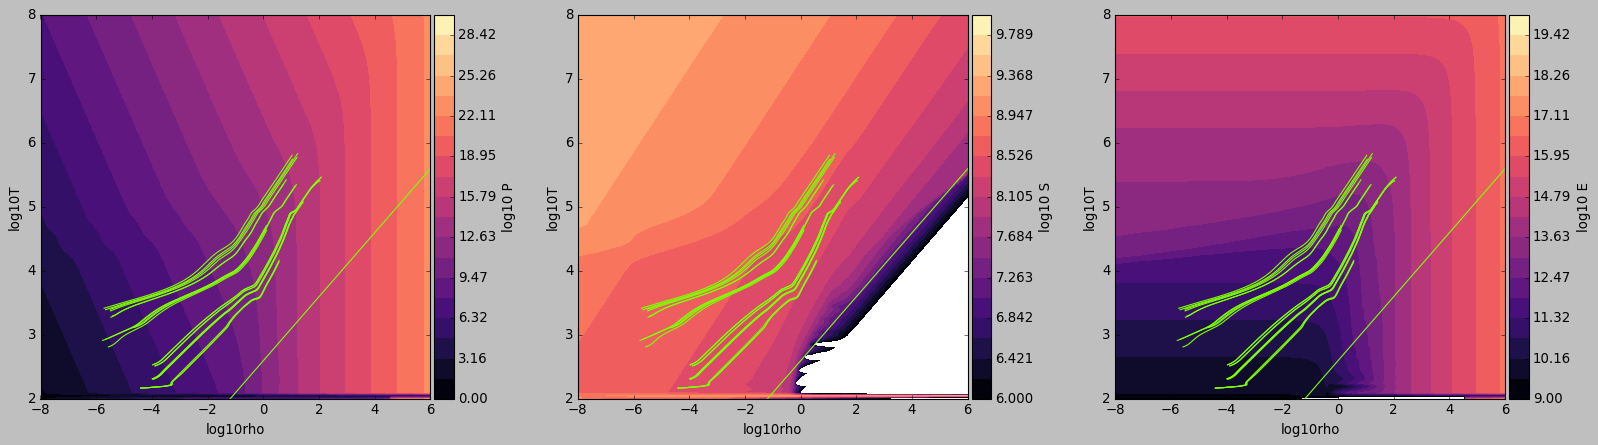

In [3]:
smoothing_kernel = 1

cms19_H = meos.CMStable("../2021_chabrier+_tables/TABLE_H_Trho_v1",units='cgs',F_smoothing_kernel=smoothing_kernel)
meos.plot_PSE(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid,plot_tracks=True)

cms19_He = meos.CMStable("../2021_chabrier+_tables/TABLE_HE_Trho_v1",units='cgs',F_smoothing_kernel=smoothing_kernel)
#meos.plot_PSE(cms19_He, 10**cms19_He.log10Pgrid,10**cms19_He.log10Sgrid,10**cms19_He.log10Ugrid,plot_tracks=True)

new_P, new_S, new_E = meos.interpolate_problematic_values(cms19_He,bad_rho_idxs=np.arange(193,203), bad_T_idxs=[79,80,81])
meos.plot_PSE(cms19_He, 10**new_P,10**new_S,10**new_E,plot_tracks=True)

In [4]:
'''
meos.contourf_sublots_with_colorbars(nRow=1, nCol=2, 
                                xs=cms19_H.log10rhogrid,
                                ys=cms19_H.log10Tgrid,
                                zs=[np.log10(cms19_H.Fgrid),np.log10(-1*cms19_H.Fgrid)],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=(-18,18),
                                levels=30,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10(F)','log10(-F)'],
                                cmap=['coolwarm','coolwarm_r'], vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)

meos.contourf_sublots_with_colorbars(nRow=1, nCol=1, 
                                xs=cms19_H.log10rhogrid,
                                ys=cms19_H.log10Tgrid,
                                zs=np.log10(np.abs(cms19_H.Fgrid)),
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=None,
                                levels=30,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels='log10(abs(F))',
                                cmap='magma', vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)
'''

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_74603/109302042.py:1: SyntaxWarning: invalid escape sequence '\l'
  '''


"\nmeos.contourf_sublots_with_colorbars(nRow=1, nCol=2, \n                                xs=cms19_H.log10rhogrid,\n                                ys=cms19_H.log10Tgrid,\n                                zs=[np.log10(cms19_H.Fgrid),np.log10(-1*cms19_H.Fgrid)],\n                                xlims=(-8,6),\n                                ylims=(2,8),\n                                zlims=(-18,18),\n                                levels=30,\n                                xlabels=r'$\\log_{10}\rho$',\n                                ylabels=r'$\\log_{10}T$',\n                                zlabels=['log10(F)','log10(-F)'],\n                                cmap=['coolwarm','coolwarm_r'], vlines=None, hlines=None, otherlines_x=None, otherlines_y=None, savename=None)\n\nmeos.contourf_sublots_with_colorbars(nRow=1, nCol=1, \n                                xs=cms19_H.log10rhogrid,\n                                ys=cms19_H.log10Tgrid,\n                                zs=np.log10(np.ab

/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:165: RuntimeWarning: invalid value encountered in log10
  self.log10Fgrid = np.log10(self.Fgrid)
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:166: RuntimeWarning: invalid value encountered in log10
  self.F_log10Pgrid = np.log10(self.F_Pgrid)
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:168: RuntimeWarning: invalid value encountered in log10
  self.F_log10Egrid = np.log10(self.F_Egrid)
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1123: UserWarning: The following kwargs were not used by contour: 'shading'
  cs = axes[i,j].contourf(xs[i*nCol + j], ys[i*nCol + j], zs[i*nCol + j], shading='nearest', cmap=cmap[i*nCol + j], levels=np.linspace(zlims[i*nCol+j][0],zlims[i*nCol+j][1],levels[i*nCol+j]))


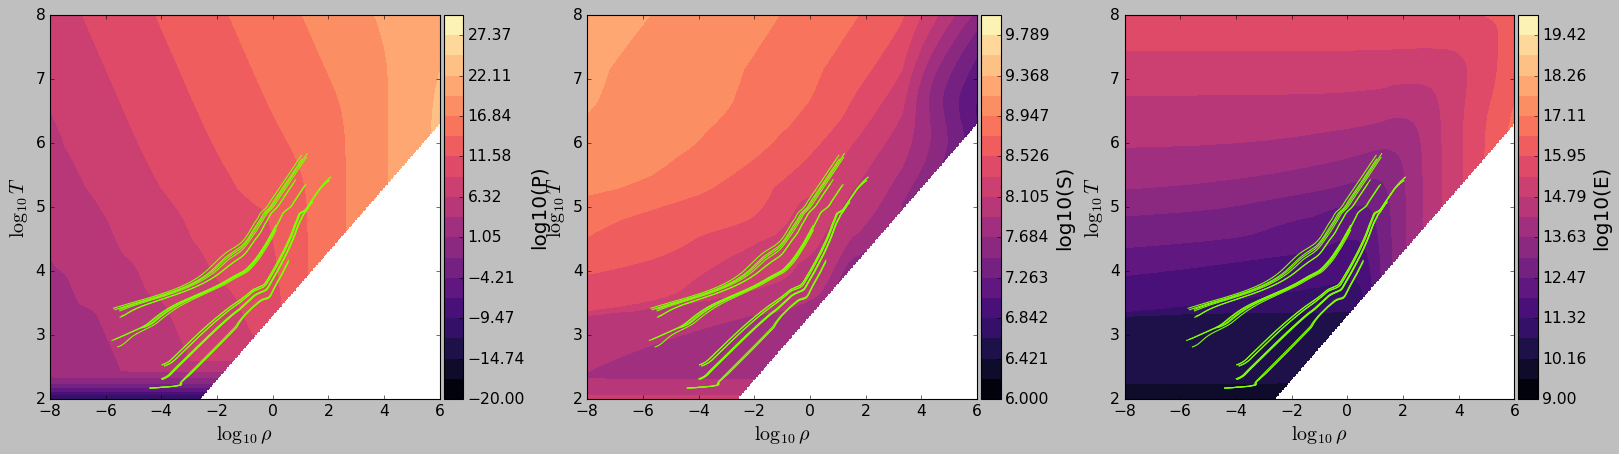

In [5]:
my_Z = meos.read_MESAtable("../my_MESAformat_tables/mesa-planetblend_100z00x.data")
my_Z_Trho = meos.reshapeQTgrid(my_Z,-8,6)
#print(type(my_Z_Trho))
#print(np.shape(my_Z_Trho))

Z = meos.simple_table()
Z.X = 0.
Z.Y = 0.
Z.Z = 1.

Z.log10Tgrid = my_Z_Trho[:,:,0].T
Z.log10rhogrid = my_Z_Trho[:,:,-1].T

Z.log10Pgrid = my_Z_Trho[:,:,1].T
Z.log10Sgrid = my_Z_Trho[:,:,3].T
Z.log10Ugrid = my_Z_Trho[:,:,2].T

Z.compute_atomic_number()
Z.compute_F(F_smoothing_kernel=smoothing_kernel)

meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=Z.log10rhogrid,
                                ys=Z.log10Tgrid,
                                zs=[Z.log10Pgrid,Z.log10Sgrid,Z.log10Ugrid],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(-20,30),(6,10),(9,20)],
                                levels=20,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10(P)','log10(S)','log10(E)'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=[prof['logRho'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='Z', plot_interpolation_lines=False, savename=None)





# plot orig P, S, E; F-based P,S,E ; comparison

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_74603/3398096977.py:6: RuntimeWarning: overflow encountered in power
  10**cms19_H.F_log10Pgrid/10**cms19_H.log10Pgrid,10**cms19_H.F_log10Sgrid/10**cms19_H.log10Sgrid,10**cms19_H.F_log10Egrid/10**cms19_H.log10Ugrid],


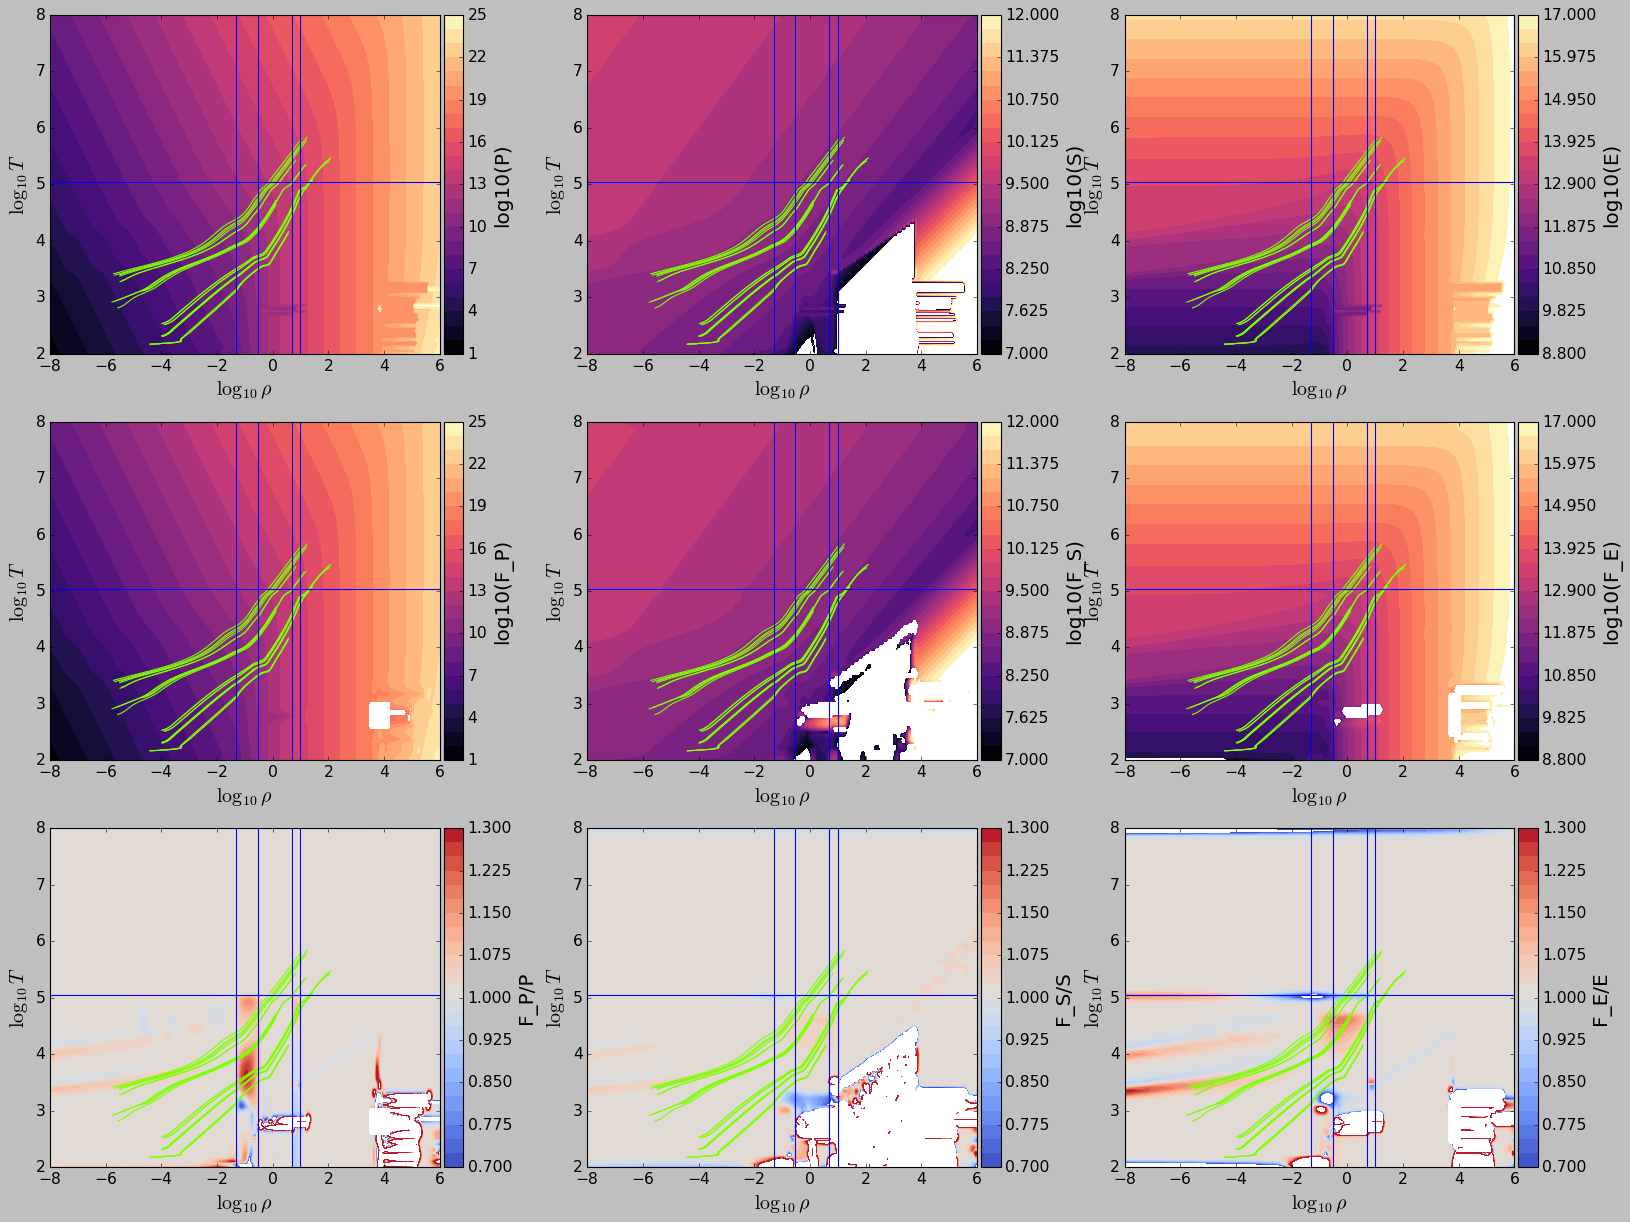

In [6]:
meos.contourf_sublots_with_colorbars(nRow=3, nCol=3, 
                                xs=cms19_H.log10rhogrid,
                                ys=cms19_H.log10Tgrid,
                                zs=[cms19_H.log10Pgrid,cms19_H.log10Sgrid,cms19_H.log10Ugrid,\
                                    cms19_H.F_log10Pgrid,cms19_H.F_log10Sgrid,cms19_H.F_log10Egrid,
                                    10**cms19_H.F_log10Pgrid/10**cms19_H.log10Pgrid,10**cms19_H.F_log10Sgrid/10**cms19_H.log10Sgrid,10**cms19_H.F_log10Egrid/10**cms19_H.log10Ugrid],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(1,25),(7,12),(8.8,17),(1,25),(7,12),(8.8,17),(0.7,1.3),(0.7,1.3),(0.7,1.3)],
                                #zlims=None,
                                levels=25,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10(P)','log10(S)','log10(E)','log10(F_P)','log10(F_S)','log10(F_E)','F_P/P','F_S/S','F_E/E'],
                                cmap=['magma','magma','magma','magma','magma','magma','coolwarm','coolwarm','coolwarm'], vlines=None, hlines=None, otherlines_x=[prof['logRho'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='H', plot_interpolation_lines=True, savename=None)

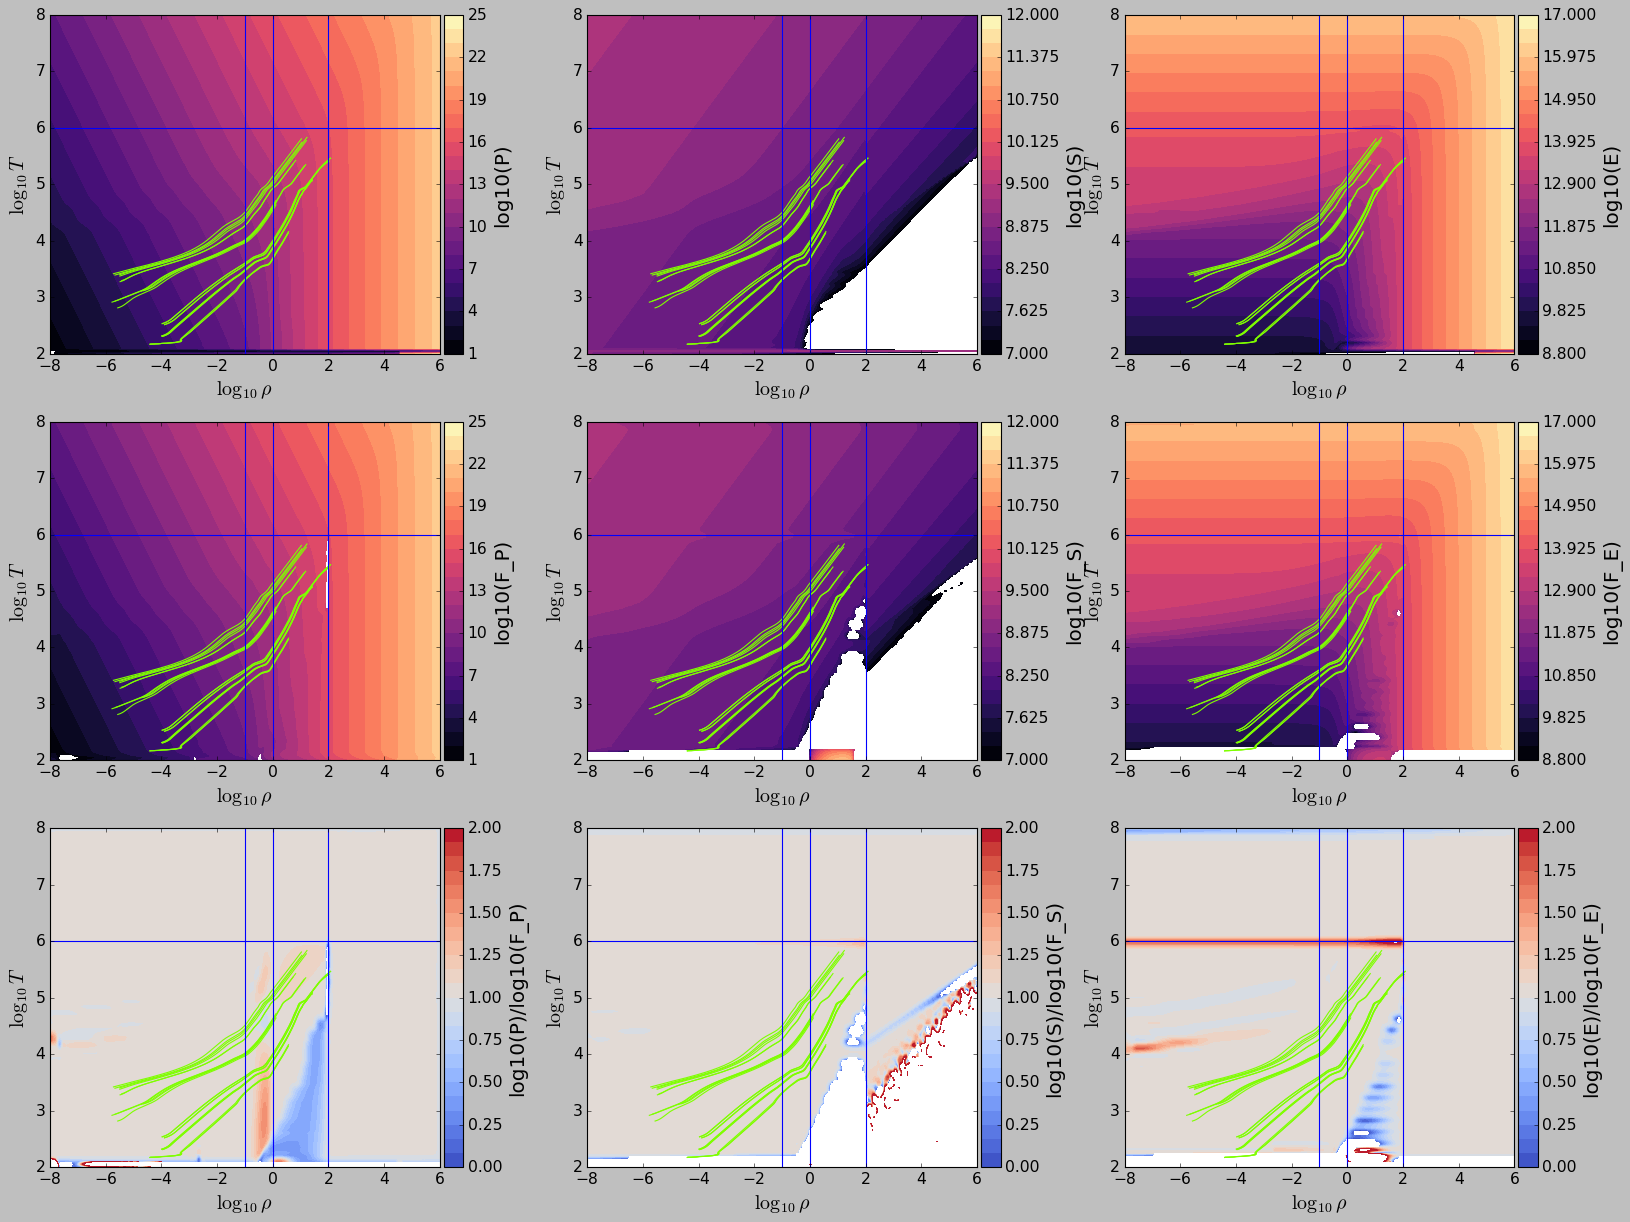

In [9]:
meos.contourf_sublots_with_colorbars(nRow=3, nCol=3, 
                                xs=cms19_He.log10rhogrid,
                                ys=cms19_He.log10Tgrid,
                                zs=[cms19_He.log10Pgrid,cms19_He.log10Sgrid,cms19_He.log10Ugrid,\
                                    cms19_He.F_log10Pgrid,cms19_He.F_log10Sgrid,cms19_He.F_log10Egrid,
                                    10**cms19_He.F_log10Pgrid/10**cms19_He.log10Pgrid,10**cms19_He.F_log10Sgrid/10**cms19_He.log10Sgrid,10**cms19_He.F_log10Egrid/10**cms19_He.log10Ugrid],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(1,25),(7,12),(8.8,17),(1,25),(7,12),(8.8,17),(0,2),(0,2),(0,2)],
                                levels=25,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10(P)','log10(S)','log10(E)','log10(F_P)','log10(F_S)','log10(F_E)','log10(P)/log10(F_P)','log10(S)/log10(F_S)','log10(E)/log10(F_E)'],
                                cmap=['magma','magma','magma','magma','magma','magma','coolwarm','coolwarm','coolwarm'], vlines=None, hlines=None, otherlines_x=[prof['logRho'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='He', plot_interpolation_lines=True, savename=None)

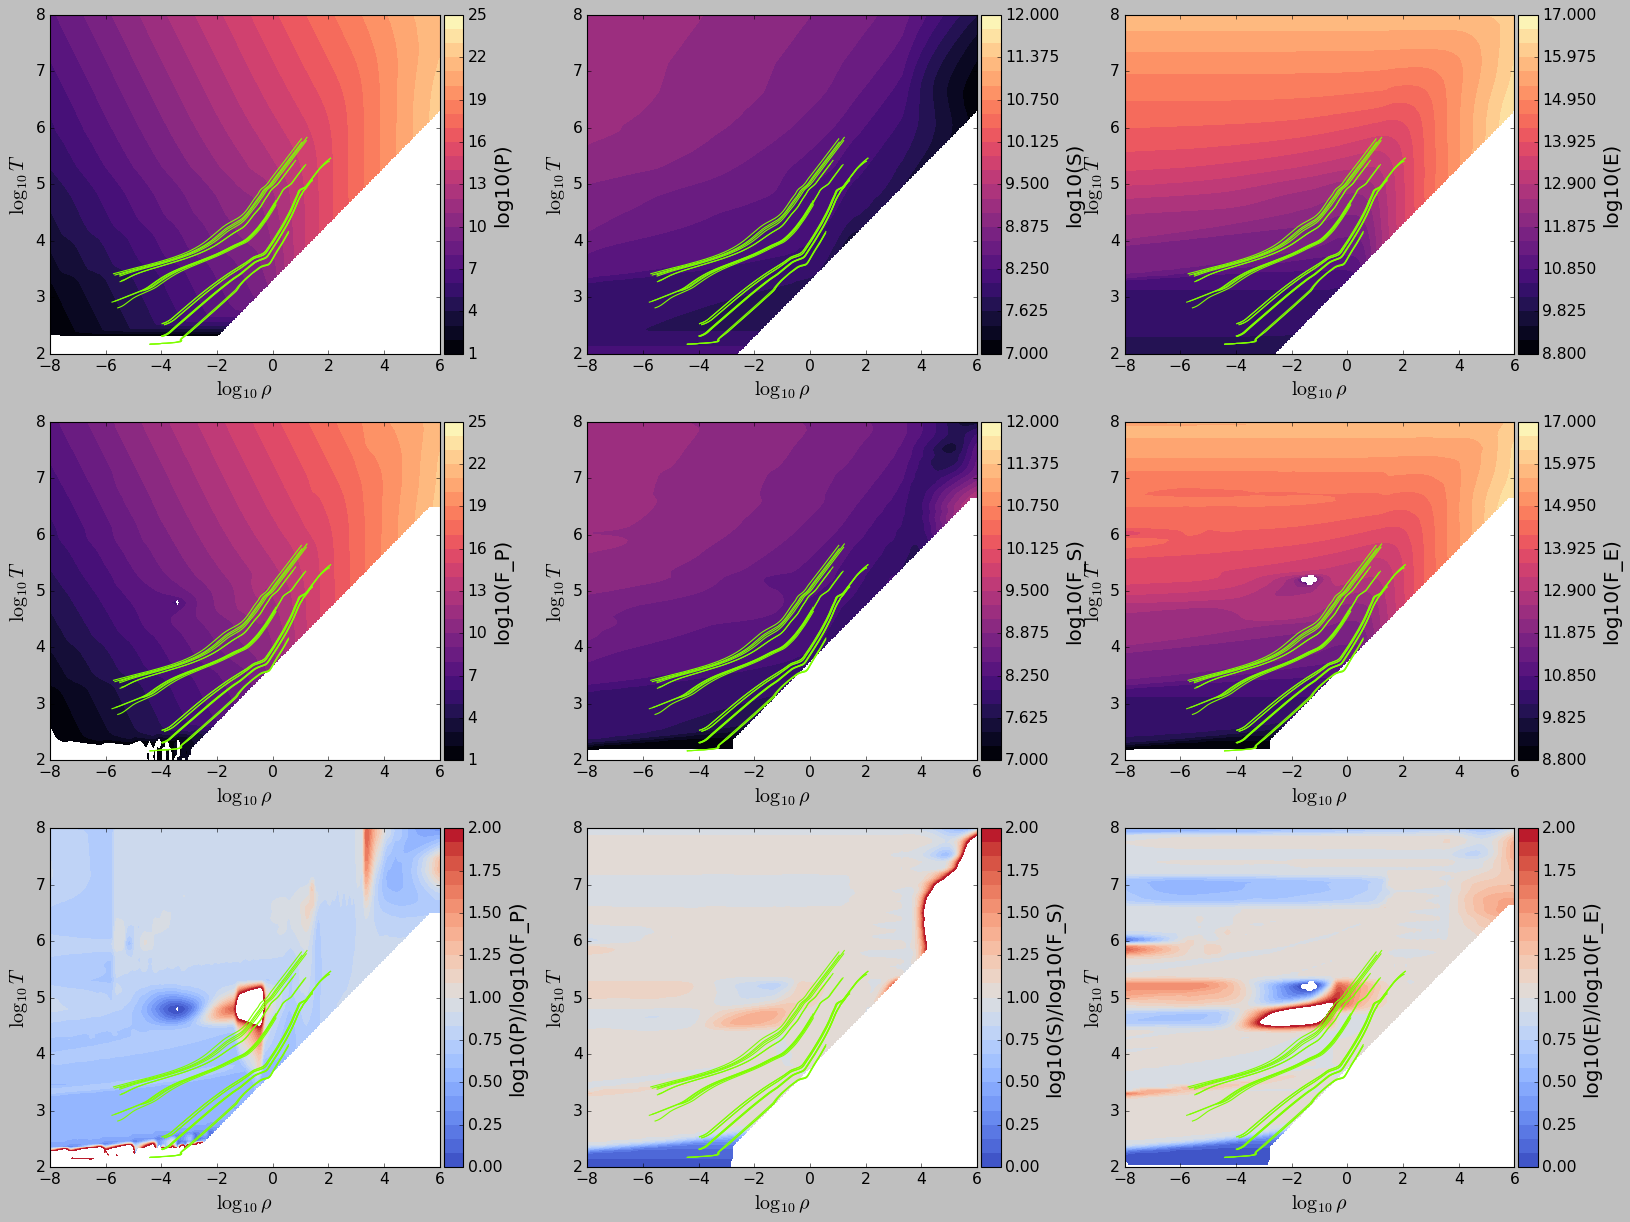

In [10]:
meos.contourf_sublots_with_colorbars(nRow=3, nCol=3, 
                                xs=Z.log10rhogrid,
                                ys=Z.log10Tgrid,
                                zs=[Z.log10Pgrid,Z.log10Sgrid,Z.log10Ugrid,\
                                    Z.F_log10Pgrid,Z.F_log10Sgrid,Z.F_log10Egrid,
                                    10**Z.F_log10Pgrid/10**Z.log10Pgrid,10**Z.F_log10Sgrid/10**Z.log10Sgrid,10**Z.F_log10Egrid/10**Z.log10Ugrid],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(1,25),(7,12),(8.8,17),(1,25),(7,12),(8.8,17),(0,2),(0,2),(0,2)],
                                levels=25,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10(P)','log10(S)','log10(E)','log10(F_P)','log10(F_S)','log10(F_E)','log10(P)/log10(F_P)','log10(S)/log10(F_S)','log10(E)/log10(F_E)'],
                                cmap=['magma','magma','magma','magma','magma','magma','coolwarm','coolwarm','coolwarm'], vlines=None, hlines=None, otherlines_x=[prof['logRho'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='Z', plot_interpolation_lines=True, savename=None)

# check that F approach resulted in good thermo consistency

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_47876/1422462555.py:4: RuntimeWarning: overflow encountered in power
  10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Egrid,
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1340: RuntimeWarning: divide by zero encountered in divide
  dse = (T * (dS_dT/dE_dT)) - 1.0
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1340: RuntimeWarning: invalid value encountered in divide
  dse = (T * (dS_dT/dE_dT)) - 1.0
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1341: RuntimeWarning: divide by zero encountered in divide
  dsp = (-1.0 * rho**2 * (dS_drho/dP_dT)) - 1.0
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1354: RuntimeWarning: invalid value encountered in multiply
  b = -1.0 * dE_dT * dse
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1355: Runtime

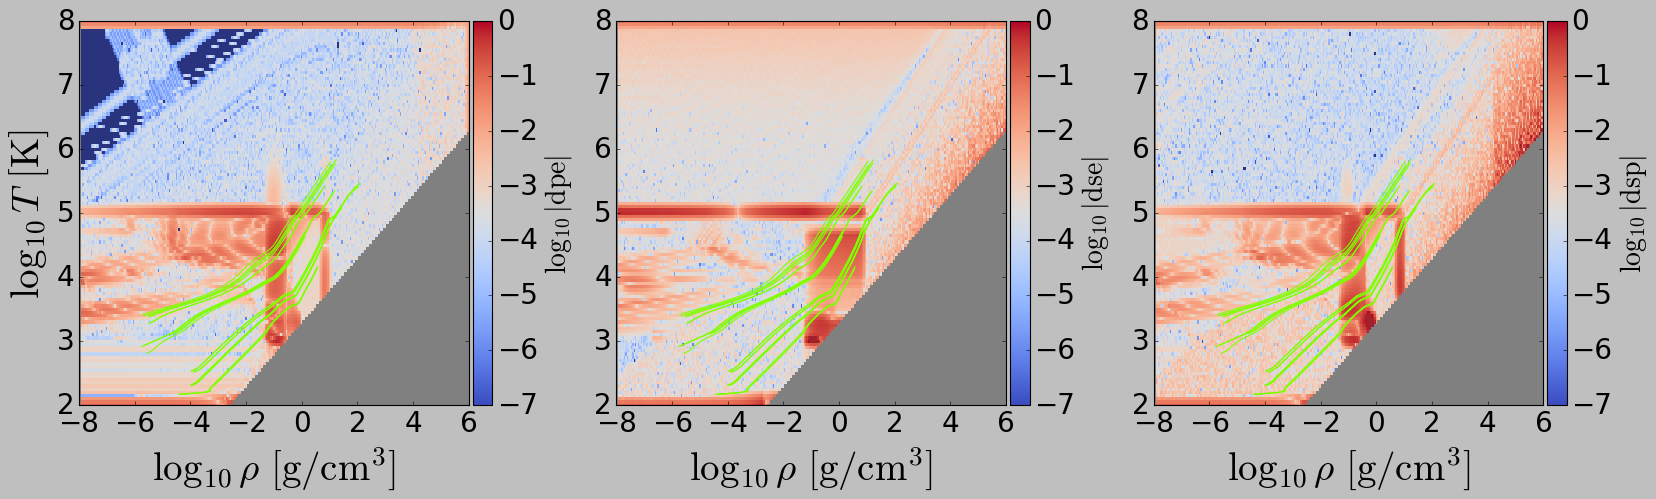

/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1469: RuntimeWarning: divide by zero encountered in log10
  cs0 = axes[0].pcolormesh(meshgrid_rho, meshgrid_T, np.log10(np.abs(dpe)), cmap=cmap, shading='nearest',vmin=-7,vmax=0)
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1483: RuntimeWarning: divide by zero encountered in log10
  cs2 = axes[2].pcolormesh(meshgrid_rho, meshgrid_T, np.log10(np.abs(dsp)), cmap=cmap, shading='nearest',vmin=-7,vmax=0)


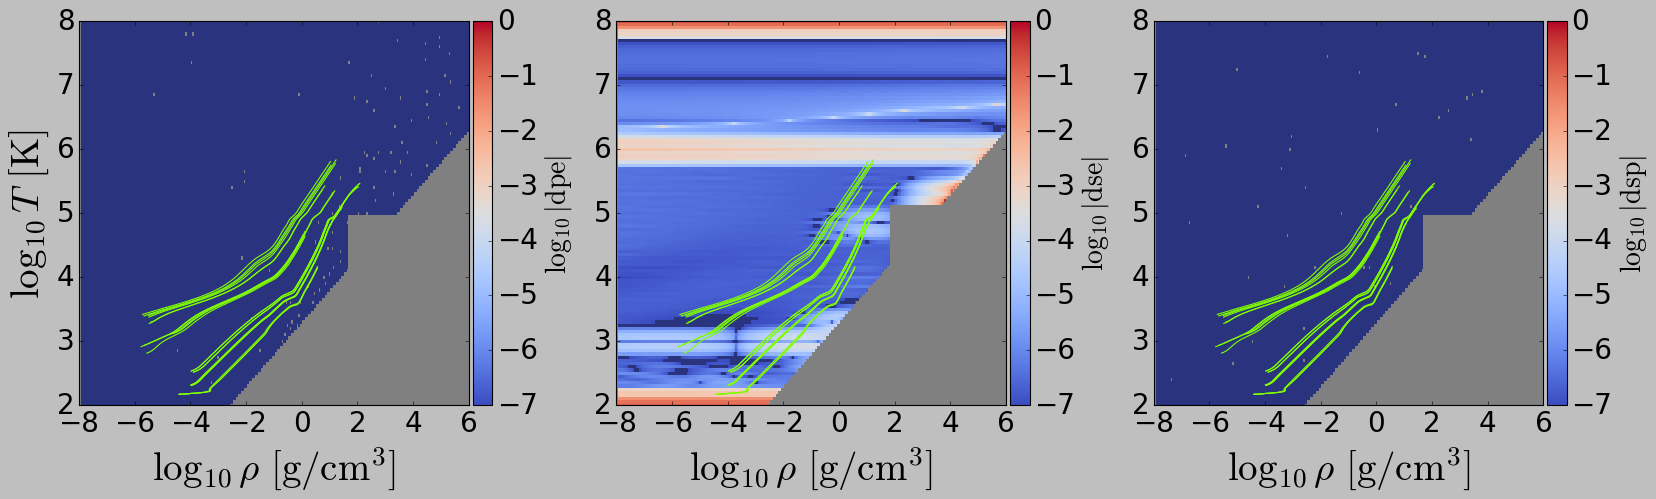

In [9]:
# original

H_dpe, H_dse, H_dsp, H_a, H_b, H_c = meos.consistency_metrics(cms19_H, 
                                                              10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Egrid,
                                                              species='H',maskUnphysicalRegion=False,
                                                              plot=False,plot_tracks=True,paperplot=True)#, savename="./CMS19_X=1.pdf")

# new

F_H_dpe, F_H_dse, F_H_dsp, F_H_a, F_H_b, F_H_c = meos.consistency_metrics(cms19_H, 
                                                                          cms19_H.F_Pgrid,cms19_H.F_Sgrid,cms19_H.F_Egrid,
                                                                          species='H',maskUnphysicalRegion=False,
                                                                          plot=False,plot_tracks=True,paperplot=True)#, savename="./CMS19_X=1_F.pdf")


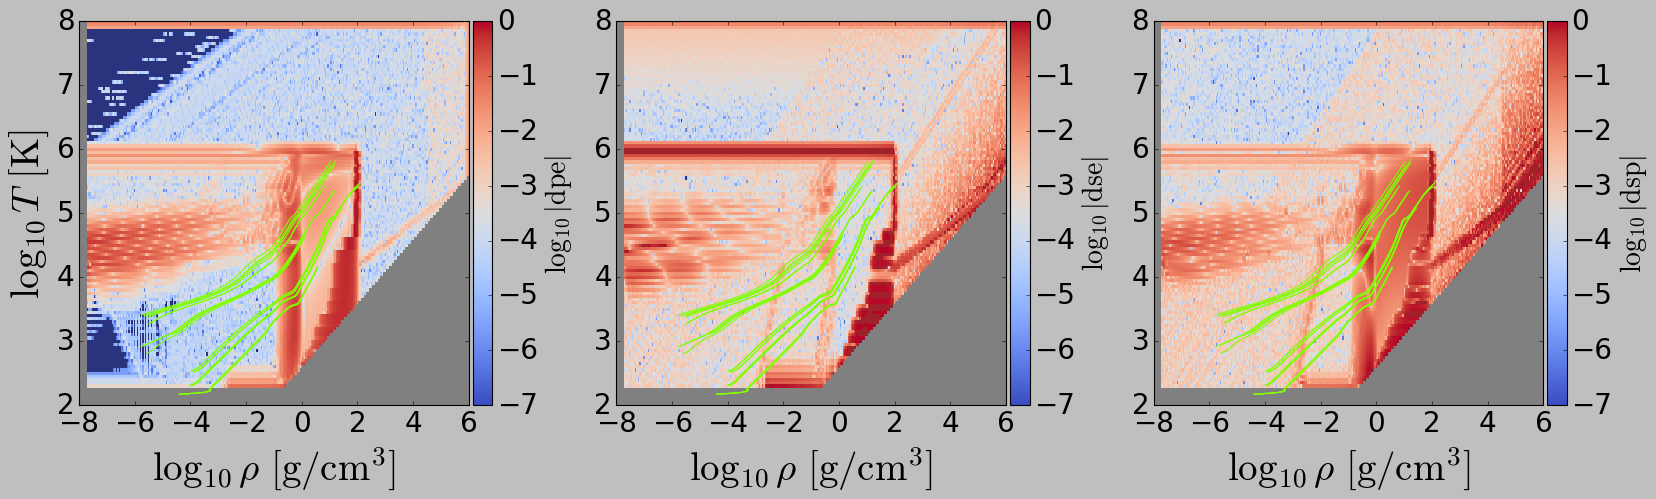

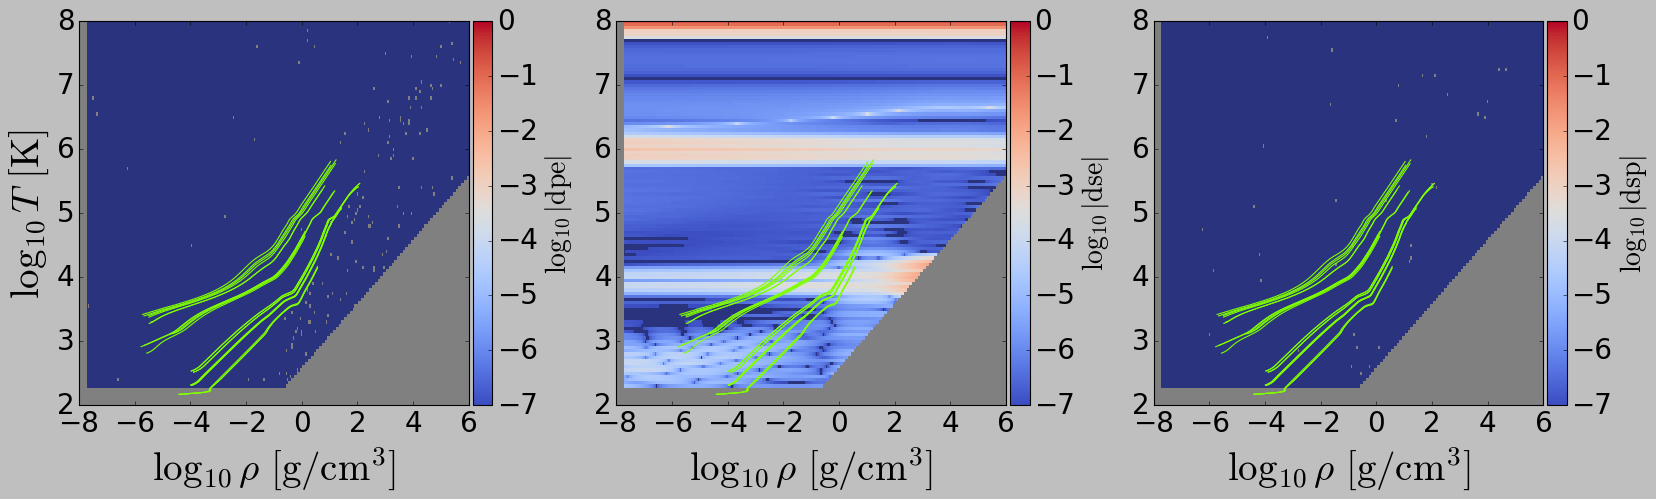

In [10]:
# original
He_dpe, He_dse, He_dsp, He_a, He_b, He_c = meos.consistency_metrics(cms19_He, 
                                                                    10**cms19_He.log10Pgrid,10**cms19_He.log10Sgrid,10**cms19_He.log10Egrid,
                                                                    species='He',maskUnphysicalRegion=False,
                                                                    plot=False,plot_tracks=True, paperplot=True)#,savename="./CMS19_Y=1.pdf")

#new
He_dpe, He_dse, He_dsp, He_a, He_b, He_c = meos.consistency_metrics(cms19_He, 
                                                                    cms19_He.F_Pgrid,cms19_He.F_Sgrid,cms19_He.F_Egrid,
                                                                    species='He',maskUnphysicalRegion=False,
                                                                    plot=False,plot_tracks=True, paperplot=True)#,savename="./CMS19_Y=1_F.pdf")


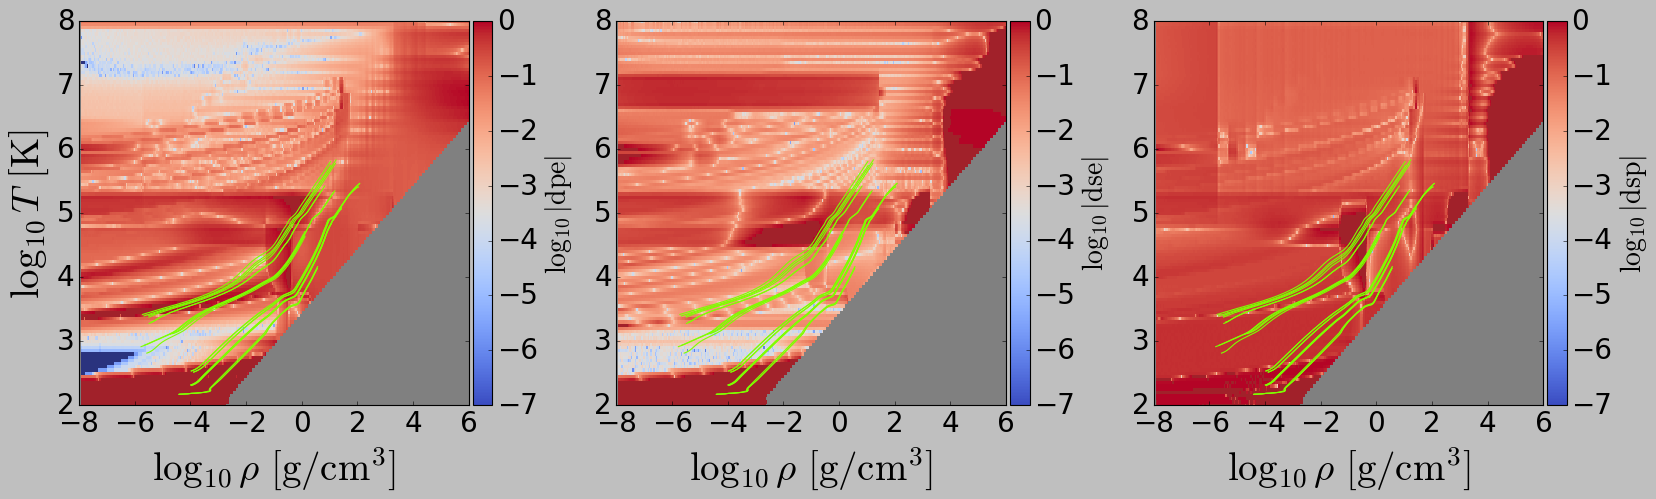

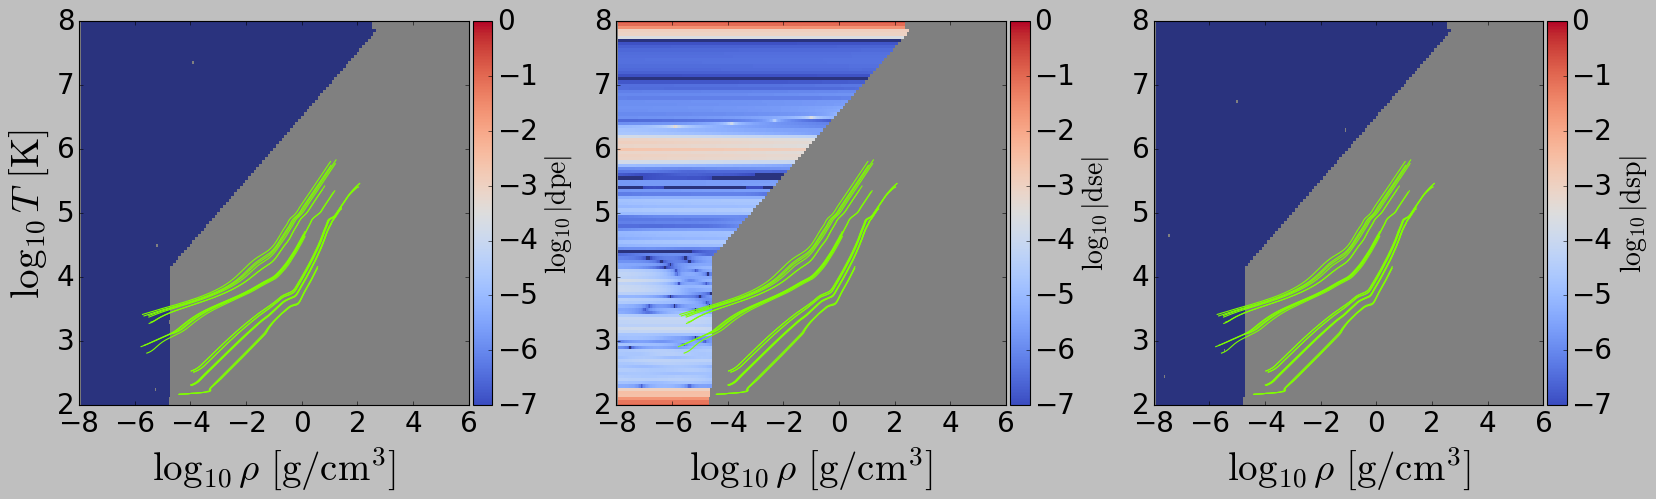

In [11]:
#original
Z_dpe, Z_dse, Z_dsp, Z_a, Z_b, Z_c = meos.consistency_metrics(Z, 
                                                              10**Z.log10Pgrid,10**Z.log10Sgrid,10**Z.log10Ugrid,
                                                              species='H',maskUnphysicalRegion=False,
                                                              plot=False,plot_tracks=True,paperplot=True)#, savename="./Zblend.pdf")

# new
Z_dpe, Z_dse, Z_dsp, Z_a, Z_b, Z_c = meos.consistency_metrics(Z, 
                                                              Z.F_Pgrid,Z.F_Sgrid,Z.F_Egrid,
                                                              species='H',maskUnphysicalRegion=False,
                                                              plot=False,plot_tracks=True,paperplot=True)#, savename="./Zblend_F.pdf")


In [12]:
#cms19_H.F_Pgrid,cms19_H.F_Sgrid,cms19_H.F_Egrid

In [13]:
# save results
header='log10T[K] log10P[erg/cm3] log10rho[g/cm3] log10E[erg/g] log10S[erg/g/K]'

H_filename = "tc_CMS19_H_smoothing={0}.txt".format(smoothing_kernel)
H_tosave = np.vstack((np.ravel(cms19_H.log10Tgrid,order='F'),np.ravel(cms19_H.F_log10Pgrid,order='F'),np.ravel(cms19_H.log10rhogrid,order='F'),np.ravel(cms19_H.F_log10Egrid,order='F'),np.ravel(cms19_H.F_log10Sgrid,order='F'))).T
np.savetxt(H_filename, H_tosave, header=header)

He_filename = "tc_CMS19_He_smoothing={0}.txt".format(smoothing_kernel)
He_tosave = np.vstack((np.ravel(cms19_He.log10Tgrid,order='F'),np.ravel(cms19_He.F_log10Pgrid,order='F'),np.ravel(cms19_He.log10rhogrid,order='F'),np.ravel(cms19_He.F_log10Egrid,order='F'),np.ravel(cms19_He.F_log10Sgrid,order='F'))).T
np.savetxt(He_filename, He_tosave, header=header)
